In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
dx = 0.001

In [4]:
from scipy import linalg


def FiniteDifferenceCoefficient(STENCIL, d):
    l = len(STENCIL)
    A = np.empty((l, l))
    for i in range(l):
        A[i] = STENCIL**i
    V = np.zeros(l)
    V[d] = np.math.factorial(d)
    a = linalg.solve(A, V)
    return a

In [5]:
FiniteDifferenceCoefficient(np.array([-1, 0, 1]), 1)

array([-0.5,  0. ,  0.5])

Solving the Laplace equation:
\begin{equation}
    \nabla^2 \mathbf{u}^* = 0,
\end{equation}

with the boundary conditions:
\begin{equation}
    \mathbf{u}^* = 
    \begin{cases}
        1 & \textrm{on the top edge} \\
        0 & \textrm{on the bottom edge} \\
        0 & \textrm{on the right edge} \\
        1 & \textrm{on the left edge}
    \end{cases}
\end{equation}

We start by putting the boundary conditions on $b$ vectors.

In [6]:
N = 50
xx, yy = np.meshgrid(np.arange(N), np.arange(N))
x = xx.flatten()
y = yy.flatten()

D2 = np.eye(N, k=1) + np.eye(N, k=-1) - 2 * np.eye(N)
D2 /= dx**2
L = np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2)

# Left:
L[x == 0] = 0
L[x == 0, x == 0] = 1

# Right:
L[x == (N - 1)] = 0
L[x == (N - 1), x == (N - 1)] = 1

# Top:
L[y == 0] = 0
L[y == 0, y == 0] = 1

# Bottom:
L[y == (N - 1)] = 0
L[y == (N - 1), y == (N - 1)] = 1

b_ux = np.zeros(N**2)
b_uy = np.zeros(N**2)

b_ux[x == (N - 1)] = 0  # right
b_ux[x == 0] = 1  # left
b_ux[y == (N - 1)] = 0  # top
b_ux[y == 0] = 0  # bottom

b_uy[x == (N - 1)] = 0  # right
b_uy[x == 0] = 0  # left
b_uy[y == (N - 1)] = 1  # top
b_uy[y == 0] = 0  # bottom

Then we solve for $\mathbf{u}^*$.

In [7]:
u_starx = linalg.solve(L, b_ux)
u_stary = linalg.solve(L, b_uy)

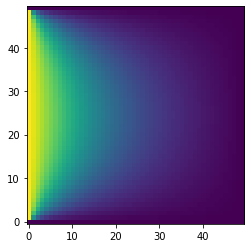

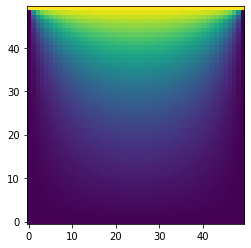

In [8]:
plt.imshow(u_starx.reshape(N, N), origin="lower")
plt.show()

plt.imshow(u_stary.reshape(N, N), origin="lower")
plt.show()

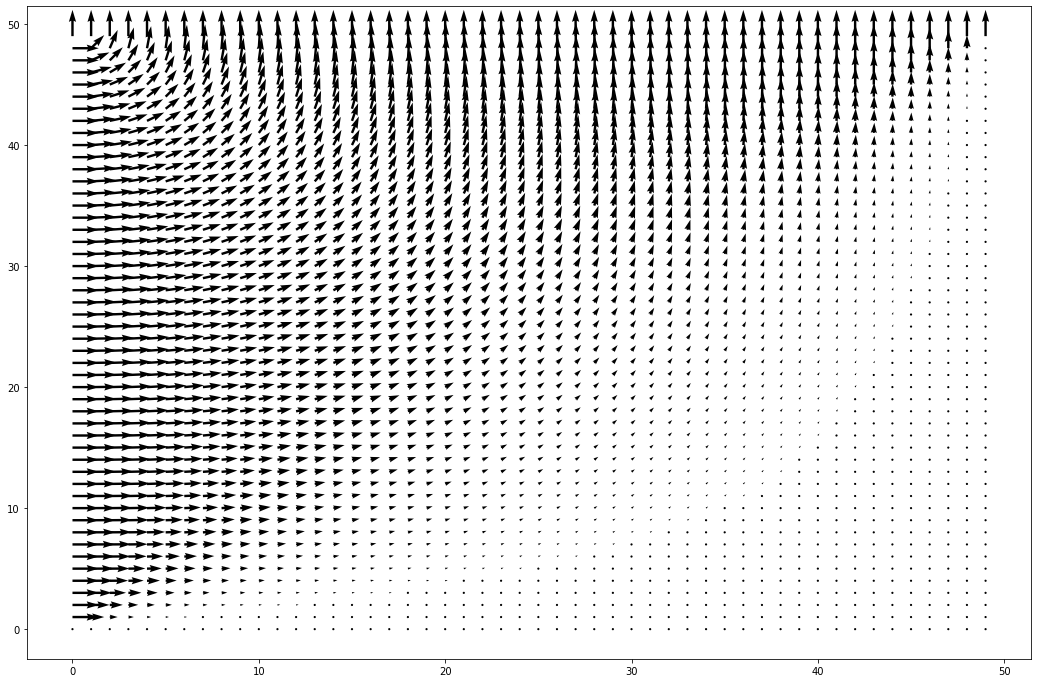

In [9]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, u_starx, u_stary)
plt.show()

\begin{equation}
    \mathbf{u} = \mathbf{u}^* + \nabla \phi \\
    \nabla \cdot \mathbf{u} = \nabla \cdot \mathbf{u}^* + \nabla^2 \phi
\end{equation}
\begin{equation}
    \nabla^2 \phi = - \nabla \cdot \mathbf{u}^*
\end{equation}

Solving the equation:
\begin{equation}
    \nabla^2 \phi = - \nabla \cdot \mathbf{u}^*.
\end{equation}

with the boundary conditions (?):
\begin{equation}
    \phi = 
    \begin{cases}
        1 & \textrm{on the top edge} \\
        0 & \textrm{on the bottom edge} \\
        0 & \textrm{on the right edge} \\
        1 & \textrm{on the left edge}
    \end{cases}
\end{equation}

To solve for $\phi$, we take the divergence of $\mathbf{u}^* \left( \frac{\partial u_x}{\partial x} + \frac{\partial u_y}{\partial y} \right)$:

In [10]:
D1 = 0.5 * np.eye(N, k=1) - 0.5 * np.eye(N, k=-1)
D1[0,0] = -1
D1[0,1] = 1
D1[-1,-1] = 1
D1[-1,-2] = -1
D1 /= dx
Dx = np.kron(np.eye(N), D1)
Dy = np.kron(D1, np.eye(N))

Add the force here, maybe?

In [11]:
np.shape(Dx), np.shape(u_starx)

((2500, 2500), (2500,))

In [12]:
DXX = Dx @ u_starx
DYY = Dy @ u_stary

In [13]:
D2 = np.eye(N, k=1) + np.eye(N, k=-1) - 2 * np.eye(N)
D2 /= dx**2
L = np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2)

In [14]:
# res_ = linalg.solve(L, (-(L1 @ u_starx + L1 @ u_stary)))
phi = linalg.solve(L, (-(DXX + DYY)))

In [15]:
dphi = [Dx @ phi, Dy @ phi]

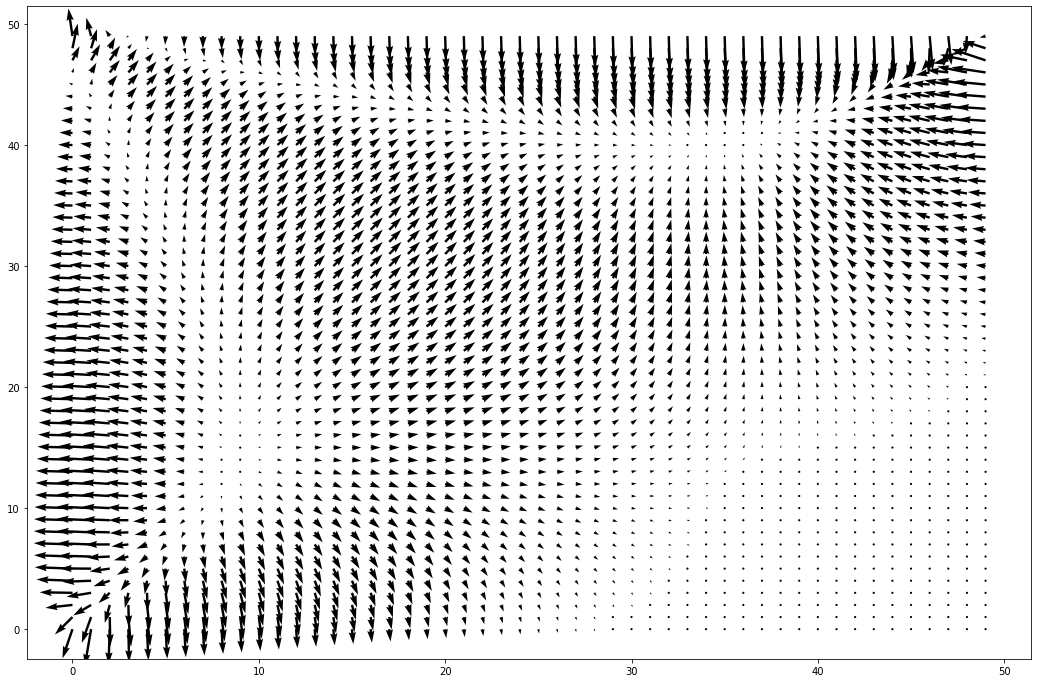

In [16]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, dphi[0], dphi[1])
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

In [17]:
ux = u_starx + dphi[0]
uy = u_stary + dphi[1]

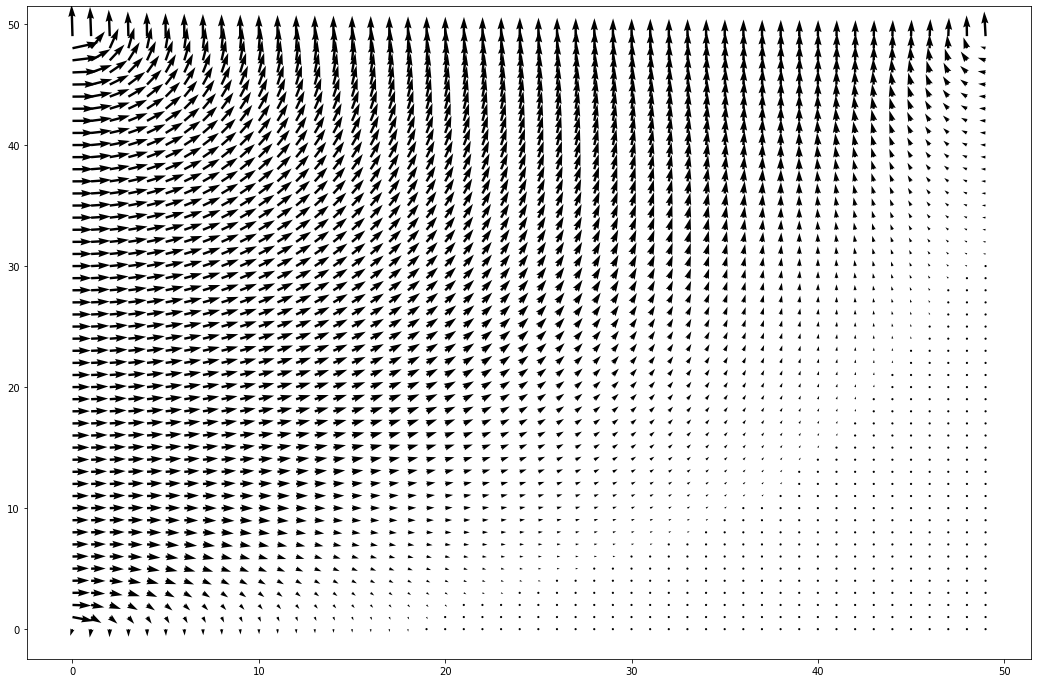

In [18]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, ux, uy)
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

(50, 50) (2500,)


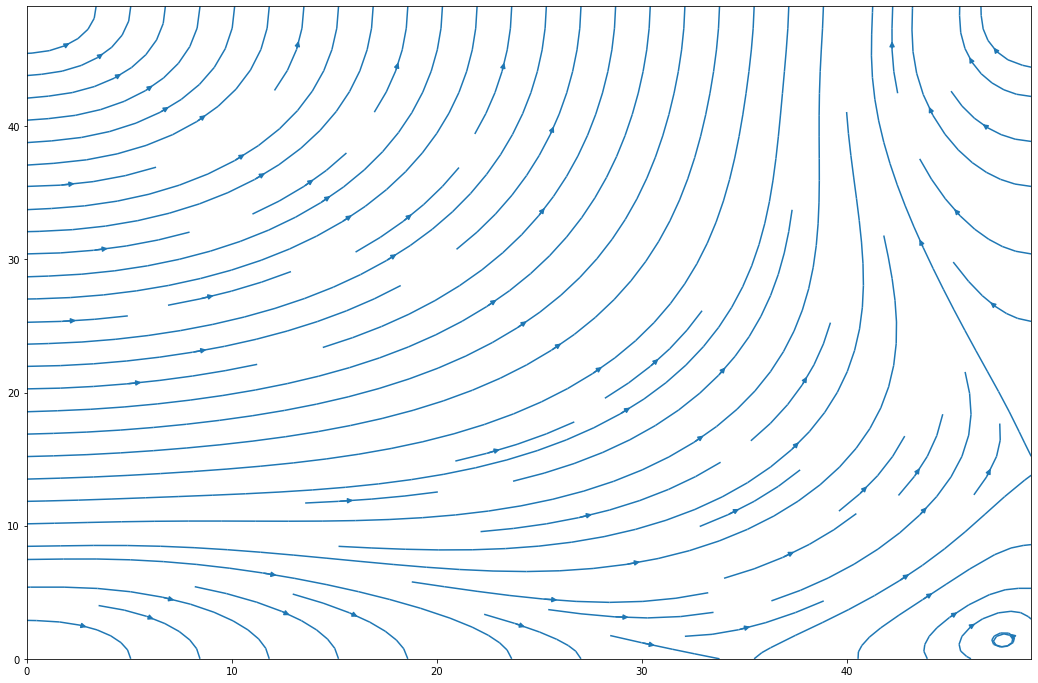

In [19]:
plt.figure(figsize=(18, 12))
#plt.quiver(xx, yy, ux, uy)
print(xx.shape, ux.shape)
plt.streamplot(xx, yy, ux.reshape(*xx.shape), uy.reshape(*xx.shape))
plt.show()

Now we add a force so the functions read:
\begin{equation}
    \nabla^2 u = - \nabla p + \mathbf{F}. \\
    \nabla \cdot u = 0. \\
\end{equation}

Now that we add a force, we have to solve:
\begin{equation}
    \nabla^2 \mathbf{u}^* = -\mathbf{F}.
\end{equation}

In [20]:
N = 50
xx, yy = np.meshgrid(np.arange(N), np.arange(N))
x = xx.flatten()
y = yy.flatten()

dx = 0.001

D2 = np.eye(N, k=1) + np.eye(N, k=-1) - 2 * np.eye(N)
D2 /= dx**2
L = np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2)

# Left:
L[x == 0] = 0
L[x == 0, x == 0] = 1

# Right:
L[x == (N - 1)] = 0
L[x == (N - 1), x == (N - 1)] = 1

# Top:
L[y == 0] = 0
L[y == 0, y == 0] = 1

# Bottom:
L[y == (N - 1)] = 0
L[y == (N - 1), y == (N - 1)] = 1

#Fx = np.exp(-x**2 - y**2) # np.zeros(N**2)#
Fx = x + 1/x**2  #-10000*np.exp(- (x-N/2)**2 - (y-N/2)**2)
Fy = y + 1/y**2

b_ux = -Fx.copy()/dx  #np.zeros(N**2)
b_uy = -Fy.copy()/dx  #np.zeros(N**2)

b_ux[x == (N - 1)] = 1  # right
b_ux[x == 0] = 1  # left
b_ux[y == (N - 1)] = 0  # top
b_ux[y == 0] = 0  # bottom

b_uy[x == (N - 1)] = 0  # right
b_uy[x == 0] = 0  # left
b_uy[y == (N - 1)] = 0  # top
b_uy[y == 0] = 0  # bottom

/tmp/ipykernel_75/2629597971.py:29: RuntimeWarning: divide by zero encountered in true_divide
  Fx = x + 1/x**2  #-10000*np.exp(- (x-N/2)**2 - (y-N/2)**2)
/tmp/ipykernel_75/2629597971.py:30: RuntimeWarning: divide by zero encountered in true_divide
  Fy = y + 1/y**2


In [21]:
Fx

array([        inf,  2.        ,  2.25      , ..., 47.00045269,
       48.00043403, 49.00041649])

Then we solve for $\mathbf{u}^*$.

In [22]:
u_starx = linalg.solve(L, b_ux)
u_stary = linalg.solve(L, b_uy)

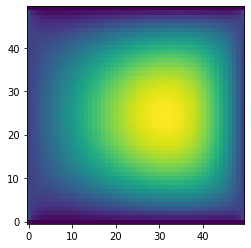

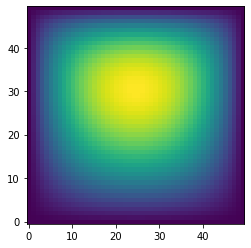

In [23]:
plt.imshow(u_starx.reshape(N, N), origin="lower")
plt.show()

plt.imshow(u_stary.reshape(N, N), origin="lower")
plt.show()

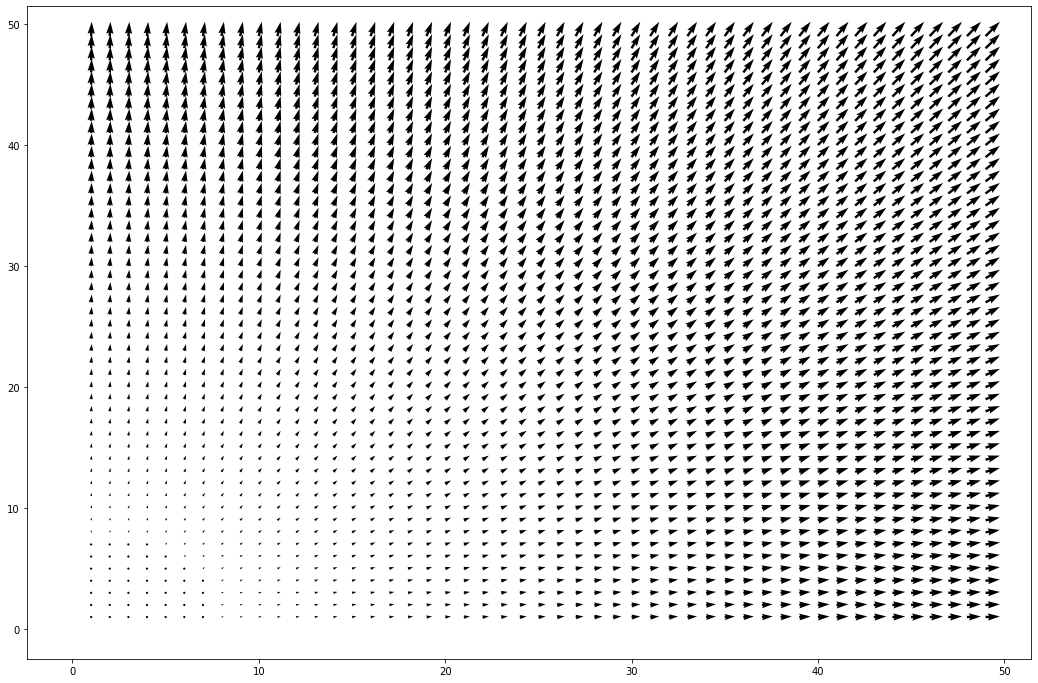

In [24]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, Fx, Fy)
plt.show()

In [25]:
D1 = 0.5 * np.eye(N, k=1) - 0.5 * np.eye(N, k=-1)
D1[0,0] = -1
D1[0,1] = 1
D1[-1,-1] = 1
D1[-1,-2] = -1
D1 /= dx
Dx = np.kron(np.eye(N), D1)
Dy = np.kron(D1, np.eye(N))

Add the force here, maybe?

In [26]:
np.shape(Dx), np.shape(u_starx)

((2500, 2500), (2500,))

In [27]:
DXX = Dx @ u_starx
DYY = Dy @ u_stary

In [28]:
D2 = np.eye(N, k=1) + np.eye(N, k=-1) - 2 * np.eye(N)
D2 /= dx**2
L = np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2)

In [29]:
# res_ = linalg.solve(L, (-(L1 @ u_starx + L1 @ u_stary)))
phi = linalg.solve(L, (-(DXX + DYY)))

In [30]:
dphi = [Dx @ phi, Dy @ phi]

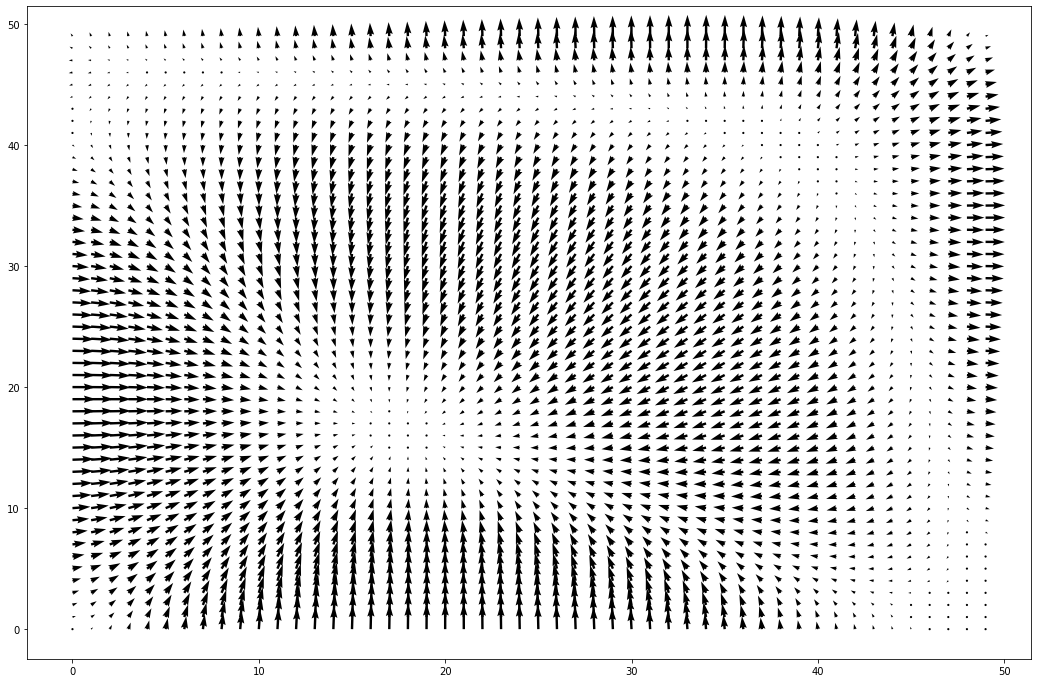

In [31]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, dphi[0], dphi[1])
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

In [32]:
ux = u_starx + dphi[0]
uy = u_stary + dphi[1]

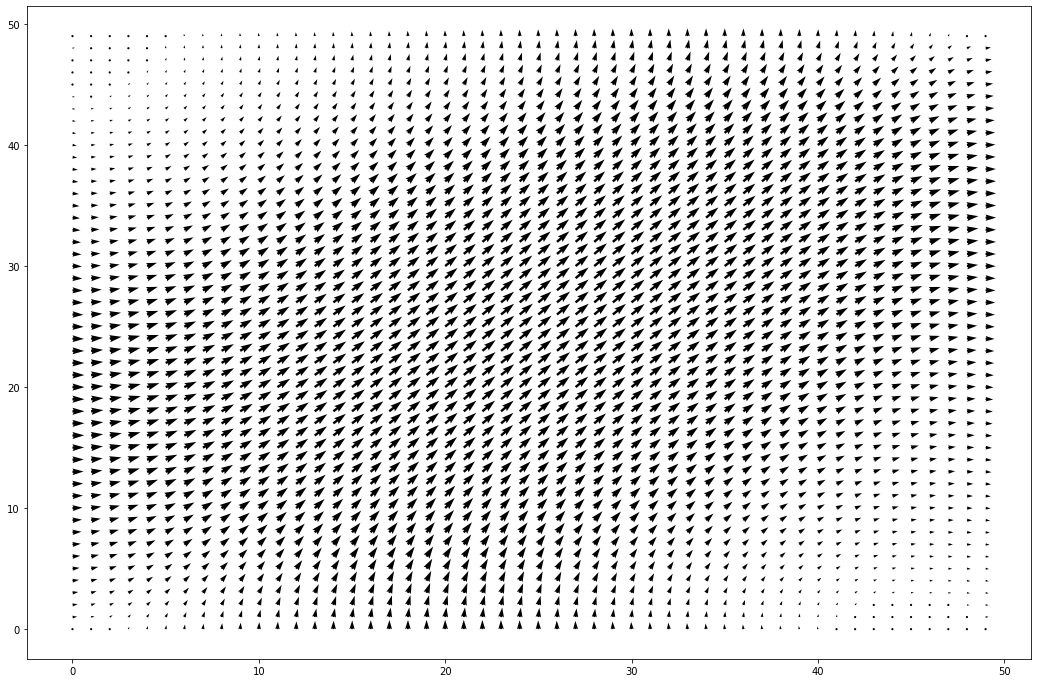

In [33]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, ux, uy)
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

(50, 50) (2500,)


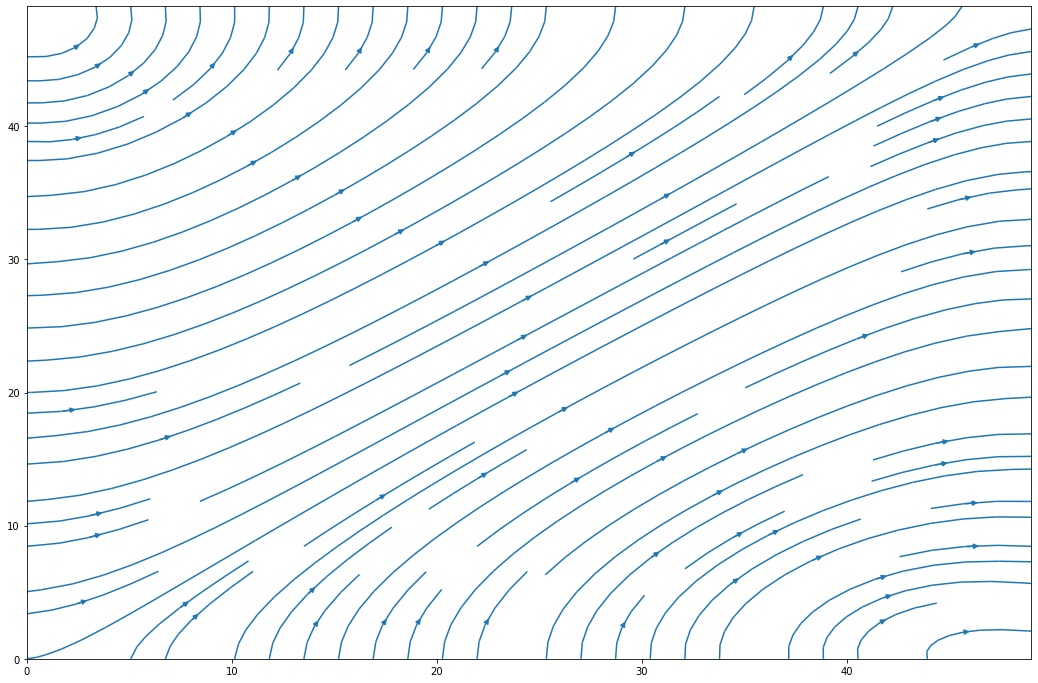

In [34]:
plt.figure(figsize=(18, 12))
#plt.quiver(xx, yy, ux, uy)
print(xx.shape, ux.shape)
plt.streamplot(xx, yy, ux.reshape(*xx.shape), uy.reshape(*xx.shape))
plt.show()

In [35]:
ftgyhunjmk

NameError: name 'ftgyhunjmk' is not defined

In [ ]:
uxdx = Dx @ ux
uxdy = Dy @ ux
uydx = Dx @ uy
uydy = Dy @ uy
uydx

In [ ]:
X, Y = np.meshgrid(x, x)
Fx = X**2
Fy = 0 * X
plt.quiver(X, Y, Fx, Fy)